

# Project: Investigate Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<ul>
    <li>In this investigation project, I will make some researches on movie database data.</li>
    <li>Before doing that, I will start with wrangling on data to understand its structure.</li>
    <li>Afterwards, I will define some questions to find related answers according to research.</li>
    <li>Then I will clean data and pass to explore data.</li>
    <li>At the end, I will try to share my findings according to researchs I made.</li>
</ul>

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Some Questions to ask:
<ul>
    <li> Which actor/actress has played at most?</li>
    <li> Which actors/actress has played at which year most?</li>
    <li> Which actor/actress has worked with which director at most?</li>
    <li> Which year has most of the productions?</li>
    <li> Which genres have higher votes?</li>
</ul>

### General Properties

**>** Due to irrelevancy, I have eliminated **"id"** and **"imdb_id"** columns from my dataframe

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv', usecols=range(2,21))
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**>** As mentioned in dataset options, **"genres", "cast", "keywords"  and "production_companies"** columns include related data which are seperated with "|"

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), in

**>** It seems that there are **approximately 8000 records** having no homepages.


In [4]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**>** There are 10 string fields and 9 numerical fields

In [5]:
df.nunique()

popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

<ul>
    <li>It seems that there are **56 years of releases** (release_date is a non-null field)</li>
</ul>

In [6]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<ul>
    <li> The "release_year" is between **1960 and 2015**</li>
    <li> The max value of "runtime" is **9000** (which makes 150 hours) - **The Story of Film: An Odyssey**</li>
    <li> **At least 50%** of movies have a runtime between **90 - 111 minutes**
</ul>

In [7]:
# the movie having 900 of runtime
df[df.runtime == 900]

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0




### Data Cleaning (Replace this with more specific notes!)

<ul>
    <li>According to "info" command result; there is no NULL values for numerical fields.</li>
    <li>NULL values exist only on string fields (shown as object): cast, homepage, director, tagline, keywords, overview, genres, production_companies</li>
    <li>At first, I will clean these NULL values with proper values</li>
</ul>
    

In [4]:
# Filling null fields

df["cast"].fillna('No cast info available',inplace=True)
df["homepage"].fillna('No webpage available',inplace=True)
df["director"].fillna('No director info available',inplace=True)
df["tagline"].fillna('No tagline info available',inplace=True)
df["keywords"].fillna('No keywords defined',inplace=True)
df["overview"].fillna('No overview available',inplace=True)
df["genres"].fillna('No genres defined',inplace=True)
df["production_companies"].fillna('No production company available',inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                10866 non-null object
director                10866 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4)

<ul>
    <li>Now, I will find if there is any duplicated record.</li>
    <li>If there is any duplicated record, I will remove them</li>
</ul>

In [11]:
# Find any duplicated record

df[df.duplicated() == True]

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,No webpage available,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [13]:
# confirm removal of duplicated record
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

Before starting research questions, I will show some basic explorations with visualization.

In [4]:
#The histogram for release year (distribution of movies on years)
import matplotlib.pyplot as plt2

plt2.figure(figsize=(12,5))

dfvisual = pd.DataFrame(df['release_year'])
plt2.ylabel('Count of Movies')
plt2.xlabel('Release Years')
plt2.title('Count of Movies by years')
plt2.xticks(rotation=90)
plt2.hist(dfvisual, bins=80)

NameError: name 'pd' is not defined

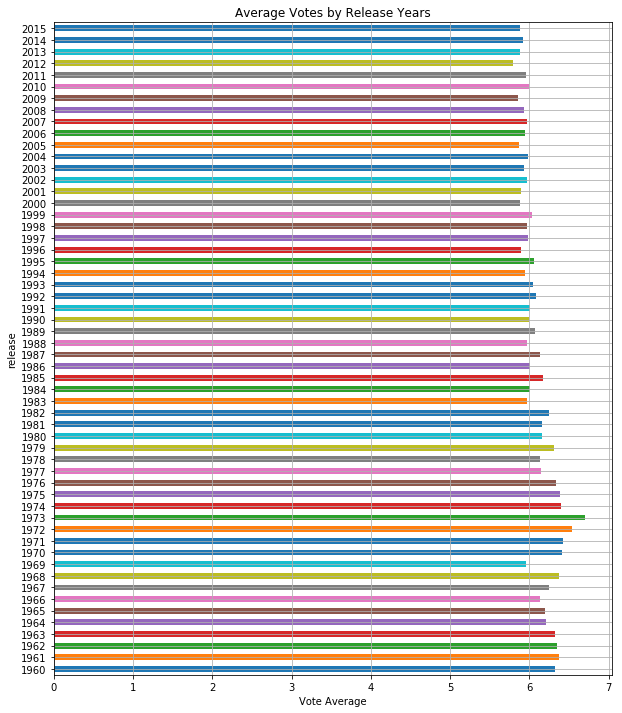

In [41]:
# yearly average of votes
dfyearvote = pd.DataFrame({'release' : df['release_year'] , 'vote' : df['vote_average']})
plt.figure(figsize=(10, 12))
plt.xlabel('Vote Average')
plt.ylabel('Release Years')
plt.title('Average Votes by Release Years')
dfyearvote.groupby('release')['vote'].mean().plot(kind="barh", grid=True)

### Research Question 1 - Which actor/actress has played at most?
<ul>
    <li>"cast" field includes all the actors (or major ones) seperated by "|"</li>
    <li>With the code below, I have splitted all actors and pushed them into an array one by one</li>
    <li>When finished, I have deduplicated all records into unique ones with corresponding count values</li>
    <li>The result shows that **Robert De Niro** is the actor played in movies at most</li>
    <li>The records as "No cast info available" are the ones with cast field empty, so they are not taken into account</li>
</ul>


In [81]:
import numpy as np

dfcastlist = []
castdict ={}

# each records' "cast" field is splitted by "|" and appended into numpy array
for i in range(0, len(df)):
    dfcastlist = np.append(dfcastlist, df.iloc[i]["cast"].split("|"))

# showing total number of splitted cast records
print(dfcastlist.shape)

# the array is deduplicated and counted by each unique cast
unique, counts = np.unique(dfcastlist, return_counts=True)

# create a dictionary with final tuples, showing the deduplicated count of cast
castdict = dict(zip(unique, counts))
print(len(castdict))

# the dictionary is reversely sorted to get actors/actress played most at the beginning
castdict = sorted(castdict.items(), key=lambda x:x[1], reverse=True)

for i in range(0,5):
    print(castdict[i])

(52644,)
19027
('No cast info available', 76)
('Robert De Niro', 72)
('Samuel L. Jackson', 71)
('Bruce Willis', 62)
('Nicolas Cage', 61)


In [30]:
#an alternative way to find the actor/actress played most is as below

df["cast"].str.get_dummies(sep="|").sum().sort_values(ascending=False)

No cast info available    76
Robert De Niro            72
Samuel L. Jackson         71
Bruce Willis              62
Nicolas Cage              61
Michael Caine             53
Robin Williams            51
John Cusack               50
John Goodman              49
Morgan Freeman            49
Susan Sarandon            48
Liam Neeson               48
Alec Baldwin              47
Julianne Moore            47
Gene Hackman              46
Christopher Walken        46
Tom Hanks                 46
Johnny Depp               46
Willem Dafoe              45
Dennis Quaid              45
Sylvester Stallone        45
Meryl Streep              44
Ed Harris                 44
Clint Eastwood            44
Donald Sutherland         44
Woody Harrelson           43
Robert Downey Jr.         43
Keanu Reeves              43
Antonio Banderas          43
Ewan McGregor             43
                          ..
Richard Dean Anderson      1
Jessica Brooks Grant       1
Jessica Bowman             1
Richard Dempse

### Research Question 2  - Which actors/actress has played at which year most?
<ul>
    <li>"cast" field includes all the actors (or major ones) seperated by "|"</li>
    <li>With the code below, I have splitted all actors, appended the release year of the movie and pushed them into an array one by one</li>
    <li>When finished, I have deduplicated all records into unique ones with corresponding count values</li>
    <li>The result shows that **James Franco** is the actor played in movies at most **in 2013**. He is the actor who played most in the movies at a single year</li>
    <li>The records as "No cast info available" are the ones with cast field empty, so they are not taken into account</li>
</ul>

In [87]:
import numpy as np

dfcastlist = []
dfcastrecord = []
castdict ={}

# each records' "cast" field is splitted by "|", extended with "release year" parameter and appended into numpy array
for i in range(0, len(df)):
    dfcastrecord = df.iloc[i]["cast"].split("|")
    if dfcastrecord[0] == "No cast info available": # these records are not appended to the final array
        continue
    dfcastrecord = [x + "@" + str(df.iloc[i]["release_year"]) for x in dfcastrecord]
    dfcastlist = np.append(dfcastlist, dfcastrecord)

# showing total number of splitted cast records
print(dfcastlist.shape)

# the array is deduplicated and counted by each unique cast
unique, counts = np.unique(dfcastlist, return_counts=True)

# create a dictionary with final tuples, showing the deduplicated count of cast
castdict = dict(zip(unique, counts))
print(len(castdict))

# the dictionary is reversely sorted to get actors/actress played most at a single year at the beginning
castdict = sorted(castdict.items(), key=lambda x:x[1], reverse=True)

for i in range(0,5):
    print(castdict[i])


(52568,)
44408
('James Franco@2013', 10)
('Dominic Purcell@2013', 7)
('Jessica Chastain@2014', 7)
('Justin Long@2009', 7)
('Liam Neeson@2014', 7)


### Research Question 3  - Which actor/actress has worked with which director at most?
<ul>
    <li>"cast" field includes all the actors (or major ones) seperated by "|"</li>
    <li>With the code below, I have splitted all actors, appended the director of the movie and pushed them into an array one by one</li>
    <li>When finished, I have deduplicated all records into unique ones with corresponding count values</li>
    <li>The result shows that **35** actors/actress have worked with same director in their career</li>
    <li>The records as "No cast info available" are the ones with cast field empty, so they are not taken into account</li>
</ul>

In [91]:
import numpy as np

dfcastlist = []
dfcastrecord = []
castdict ={}

# each records' "cast" field is splitted by "|", extended with "director" parameter and appended into numpy array
for i in range(0, 1000):#len(df)):
    dfcastrecord = df.iloc[i]["cast"].split("|")
    if dfcastrecord[0] == "No cast info available": # these records are not appended to the final array
        continue
    dfcastrecord = [x + "@" + df.iloc[i]["director"] for x in dfcastrecord]
    dfcastlist = np.append(dfcastlist, dfcastrecord)

# showing total number of splitted cast records
print(dfcastlist.shape)

# the array is deduplicated and counted by each unique cast
unique, counts = np.unique(dfcastlist, return_counts=True)

# create a dictionary with final tuples, showing the deduplicated count of cast
castdict = dict(zip(unique, counts))
print(len(castdict))

# the dictionary is reversely sorted to get actors/actress played most with a single director
castdict = sorted(castdict.items(), key=lambda x:x[1], reverse=True)

for i in range(0,40):
    print(castdict[i])

(4817,)
4782
('Adam Johnson@Anne K. Black', 2)
('Adam Sandler@Frank Coraci', 2)
('Amanda Seyfried@Seth MacFarlane', 2)
('Bill Nighy@David Hare', 2)
('Bruce Willis@Brian A Miller', 2)
('Chris Diamantopoulos@Butch Lukic', 2)
('Danny Glover@Craig Moss', 2)
('Danny Trejo@Craig Moss', 2)
("Dylan O'Brien@Wes Ball", 2)
('Emma Stone@Woody Allen', 2)
('Helena Bonham Carter@David Hare', 2)
('Ian Ziering@Anthony C. Ferrante', 2)
('Israel Luna@Israel Luna', 2)
('Jake Stormoen@Anne K. Black', 2)
('James McAvoy@Ned Benson', 2)
('Jennifer Lawrence@Francis Lawrence', 2)
('Jessica Chastain@Ned Benson', 2)
('Josh Hutcherson@Francis Lawrence', 2)
('Kate Bosworth@Michael Polish', 2)
('Kaya Scodelario@Wes Ball', 2)
('Kelly Sheridan@Karen J. Lloyd', 2)
('Kevin Hart@Tim Story', 2)
('Kevin Sorbo@Anne K. Black', 2)
('Liam Hemsworth@Francis Lawrence', 2)
('Liam Neeson@Jaume Collet-Serra', 2)
('Lorenza Izzo@Eli Roth', 2)
('Melanie Stone@Anne K. Black', 2)
('Ralph Fiennes@David Hare', 2)
('Roger Craig Smith@Butch

### Research Question 4  - Which year has most of the productions?
<ul>
    <li>The release years are made unique and pushed into a dictionary</li>
    <li>The result shows that **2014** is the year of most productions</li>
</ul>

In [94]:
import numpy as np

# by using making unique feature of numpy arrays, the tuples of unique year-count have created and pushed into a dictionary
year, counter = np.unique(df["release_year"], return_counts=True)
yeardict = dict(zip(year,counter))

# related dictionary is sorted from higher to lower
print(len(yeardict)) # shows how many years in the dictionary
yeardict = sorted(yeardict.items(), key=lambda x:x[1], reverse=True)

for i in range(0,len(yeardict)):
    print(yeardict[i])


56
(2014, 700)
(2013, 659)
(2015, 629)
(2012, 588)
(2011, 540)
(2009, 533)
(2008, 496)
(2010, 489)
(2007, 438)
(2006, 408)
(2005, 364)
(2004, 307)
(2003, 281)
(2002, 266)
(2001, 242)
(2000, 227)
(1999, 224)
(1998, 210)
(1996, 204)
(1997, 192)
(1994, 184)
(1993, 178)
(1995, 175)
(1988, 145)
(1989, 137)
(1991, 133)
(1992, 133)
(1990, 132)
(1987, 125)
(1986, 121)
(1985, 109)
(1984, 105)
(1981, 82)
(1982, 81)
(1983, 80)
(1980, 78)
(1978, 65)
(1977, 57)
(1979, 57)
(1971, 55)
(1973, 55)
(1974, 47)
(1976, 47)
(1966, 46)
(1975, 44)
(1964, 42)
(1970, 41)
(1967, 40)
(1972, 40)
(1968, 39)
(1965, 35)
(1963, 34)
(1960, 32)
(1962, 32)
(1961, 31)
(1969, 31)


### Research Question 5  - Which genres have higher votes?
<ul>
    <li>In this research, my aim is to find average vote by means of genres</li>
    <li>First, I have splitted "genre" field by "|"</li>
    <li>Then, I have added "vote_average" value to each genre record and appended into a 2d list.</li>
    <li>From list, I have created a dataframe with 2 columns</li>
    <li>By using dataframe functions, I have received mean of votes by grouping genres</li>
    <li>The result shows that **Documentary** genre has the highest vote average among other genres according to given votes average per movie</li>
</ul>

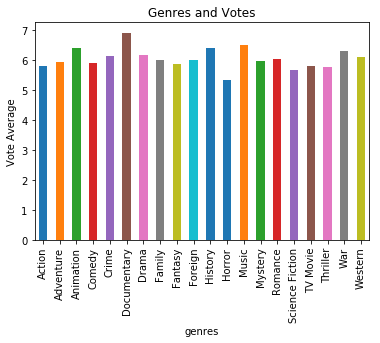

In [32]:
import pandas as pd

dfgenrelist = []
dfcastrecord = []

# each records' "genre" field is splitted by "|"
for i in range(0, len(df)):
    dfgenrerecord = df.iloc[i]["genres"].split("|")
    if dfgenrerecord[0] == "No genres defined": # these records are not appended to the final array
        continue
    
    # each genre record record is extended with vote_average value and appended to a 2d list
    for x in range(0,len(dfgenrerecord)):
        dfgenrelist.append([dfgenrerecord[x],df.iloc[i]["vote_average"]])

# 2d list is added to a dataframe
dfgenres = pd.DataFrame(dfgenrelist,columns=['genres','vote'])

# dataframe is grouped by genres to find mean of all votes and returned top 3 
dfgenres.groupby('genres')['vote'].mean().nlargest(3)
plt.xlabel('Genres')
plt.ylabel('Vote Average')
plt.title('Genres and Votes')
dfgenres.groupby('genres')['vote'].mean().plot(kind='bar')

<ul>
    <li>Above graph shows highest average as "Documentary" - at below graph it shows that "Documentary" has around 500 genre selection on all movies</li>
</ul>

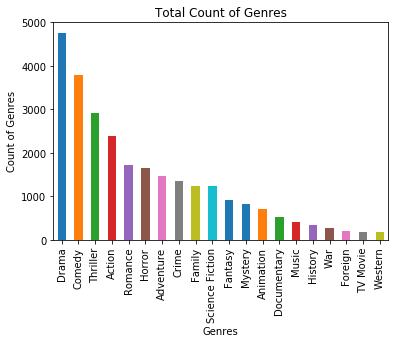

In [33]:
#pd.value_counts(dfgenres['genres']).nlargest(20) -- find the count of genres which are subject to mean operation

plt.xlabel('Genres')
plt.ylabel('Count of Genres')
plt.title('Total Count of Genres')
dfgenres['genres'].value_counts().plot(kind='bar')

<a id='conclusions'></a>
## Conclusions

<ul>
    <li>As far as I see, the data set is pretty clear to get some insights</li>
    <li>There are some columns with missing values - these columns were used during explorations
        <ul>
            <li>"cast" field has 76 NULLs. Among 10K rows, I have supposed that as negligible. I have filled those fields as "No cast info is available"</li>
            <li>"genres" field has 23 NULLs. Among 10K rows, I have also supposed that as negligible. I have filled those fields as "No genres defined"</li>
        </ul>
    </li>
    <li>First, by year 2000 there are too many movies released</li>
    <li>There are many directors and actors/actresses so it is rare to see recurring work in the same project/movie</li>
    <li>At James Franco case, having role at 10 different movies at a single year is a challenging situation when compared to other actors/actresses having more movies played at total</li>
    <li>At Robert De Niro case, it is not so surprising - expected according to professional career (years)</li>
    <li>For documentary genre, there are approximately 5% movies selected as documentary genre and the voters have voted higher generally.</li>
    <li>For deeper insights, some additional researchs could be interesting on this data set such as:
        <ul>
            <li>actors/actresses by active years</li>
            <li>average budgets per genres</li>
            <li>genres by active years</li>
        </ul>
    </li>
    <li>Without statistical test, the analysis would be made according to raw data and assumptions in general. So in order to be accurate, the statistical methods should be applied.</li>
</ul>

In [39]:
df[df.cast == 'No cast info available']["cast"].value_counts() --76
df[df.genres == 'No genres defined']["genres"].value_counts() --23

No genres defined    23
Name: genres, dtype: int64

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_reviewed.ipynb'])

0